In [74]:
## Perceptron

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
data = np.genfromtxt('perceptron_data.txt', delimiter='\t')
X, y = data[:,:2], data[:,2]
y = y.astype(int)

In [93]:
print("Class label count:",np.bincount(y))
print("X.shape:",X.shape)
print("y.shape:",y.shape)

Class label count: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [94]:
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X,y = X[shuffle_idx], y[shuffle_idx]

In [95]:
X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

In [96]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [97]:
X_train[0]

array([1.37001499, 0.89400639])

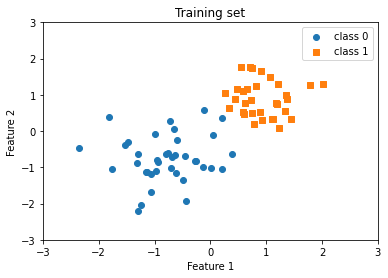

In [98]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], label = 'class 0', marker = 'o') # [Taking X_train's feature where y_train is 0, X_train's first feature or second feature] 
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], label = 'class 1', marker = 's')
plt.title("Training set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

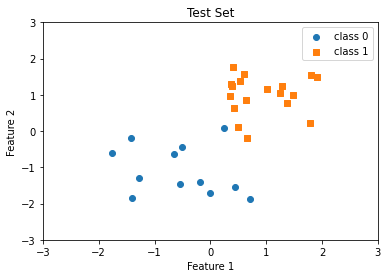

In [99]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], label = 'class 0', marker = 'o')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label = 'class 1', marker = 's')
plt.title("Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

In [100]:
class Perceptron():
    def __init__(self, features):
        self.features = features
        self.weights = np.zeros((features,1), dtype = float)
        self.bias = np.zeros(1,dtype = float)
        
    def forward(self,x):
        linear = np.dot(x,self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0) # threshold function: If linear > 0. output: 1 else 0
        return predictions
    
    def backward(self,x,y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    
    def train(self,x,y,epochs):
        for i in range(epochs):
            
            for j in range(x.shape[0]):
                errors = self.backward(x[j].reshape(1, self.features),y[j]).reshape(-1) # Reshape to match for computation
                self.weights += (errors*x[i]).reshape(self.features,1) # Reshaping back to original shape
                self.bias += errors
    
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [104]:
percep = Perceptron(features = 2)

percep.train(X_train, y_train, epochs = 5)

print("Model Parameters:")
print(f"Weights:",percep.weights)
print(f"Bias:",percep.bias)

Model Parameters:
Weights: [[5.78772653]
 [1.80709465]]
Bias: [-2.]


In [105]:
train_acc = percep.evaluate(X_train,y_train)
print("Train accuracy:",train_acc*100)

Train accuracy: 100.0


In [111]:
test_acc = percep.evaluate(X_test,y_test)
print(f"Test accuracy:",test_acc*100)

Test accuracy: 100.0


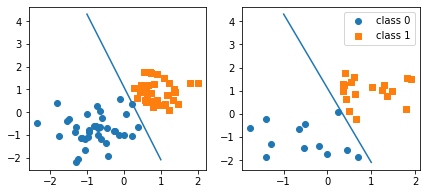

In [121]:
w, b = percep.weights, percep.bias

x0_min = -1
x1_min = ( (-(w[0] * x0_min) - b[0]) / w[1] )

x0_max = 1
x1_max = ( (-(w[0] * x0_max) - b[0]) / w[1] )


fig, ax = plt.subplots(1, 2, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend()
plt.show()